In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

##**$Miniproyecto$ $2$ $-$ $Tratamiento$ $de$ $señales$ $3$**

Manuel José Bothert Martínez, Yeison Monsalve Sanchez, Juan Manuel Marín Gallego, Alejandro Estrada Moscoso

In [ ]:
data = pd.read_csv('Dataframe_Miniproyecto_1.csv') # Cargamos el dataframe.
data[20:26]

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),Media(SSA2),Var(SSA2),Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Pot(SSA4),F_Pmax(SSA4),Energia(SSA4),Media(SSA4),Var(SSA4),Max(SSA4),Min(SSA4),Pot(SSA5),F_Pmax(SSA5),Energia(SSA5),Media(SSA5),Var(SSA5),Max(SSA5),Min(SSA5),Tipo
20,0.035135,1.367188,11.001499,0.003284,0.000032,0.035135,0.000853,0.003019,12.500000,0.552222,0.001389,7.253244e-07,0.003019,0.000551,0.001652,21.484375,0.134158,0.000553,2.636978e-07,0.001652,0.000040,0.001226,33.007812,0.084436,0.000422,1.697307e-07,0.001226,0.000015,0.002252,49.218750,0.115062,0.000379,2.586398e-07,0.002252,0.000004,Tele
21,0.029894,1.367188,4.606804,0.002967,0.000021,0.029894,0.000829,0.007911,23.632812,0.936704,0.000954,1.189736e-06,0.007911,0.000205,0.006765,23.632812,0.729775,0.000880,6.813874e-07,0.006765,0.000009,0.016724,49.414062,0.898656,0.001075,3.858378e-06,0.016724,0.000002,0.005118,36.132812,0.422817,0.001137,6.239358e-07,0.005118,0.000426,Loc
22,0.034312,1.367188,5.915285,0.003285,0.000030,0.034312,0.000892,0.003664,39.257812,0.585503,0.001027,5.236090e-07,0.003664,0.000395,0.004341,49.414062,0.357888,0.000757,5.939477e-07,0.004341,0.000010,0.003606,16.406250,0.349304,0.001000,5.822095e-07,0.003606,0.000177,0.005411,49.414062,0.263703,0.000745,5.959332e-07,0.005411,0.000022,Loc
23,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
24,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
25,0.033841,1.367188,5.774650,0.003245,0.000029,0.033841,0.000847,0.004781,49.023438,0.267329,0.001137,3.418100e-07,0.004781,0.000107,0.007078,49.023438,0.305427,0.000933,7.856088e-07,0.007078,0.000260,0.003486,35.937500,0.149797,0.000642,3.261934e-07,0.003486,0.000010,0.002687,29.101562,0.140041,0.000618,3.524628e-07,0.002687,0.000007,Loc


In [ ]:
dataSismo = np.asarray(data.drop('Tipo',1))
Tipo = data['Tipo'].tolist()

# Creamos una lista de etiquetas numéricas.
Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0       # El valor de 0 corresponde a los telesismos
for j in range(21,42,1):
  Tags[j] = 1       # El valor de 1 corresponde a los sismos locales
for l in range(42,63,1):
  Tags[l] = 2       # El valor de 2 corresponde a los sismos regionales

In [ ]:
pca = PCA(n_components = 35)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 36)
Z Projection size:  (63, 35)
PCA explained variance:  [6.53777632e+02 4.85272696e+02 2.68812864e+02 1.61791766e+02
 8.23025263e+01 4.70666973e+01 1.99137523e+01 1.56547842e+00
 7.11385250e-02 4.94515873e-02 4.33659936e-05 1.96429931e-05
 1.09655388e-05 3.73777252e-06 1.44879301e-06 4.47993757e-08
 3.27131679e-08 1.83689989e-08 1.49092002e-08 7.81468676e-09
 2.81256345e-09 2.17638349e-09 8.56512189e-10 4.88184443e-10
 3.29702931e-10 5.72923405e-12 2.69879454e-13 1.17822922e-13
 4.65010642e-14 2.02280611e-15 2.83119639e-30 2.83119639e-30
 2.83119639e-30 2.83119639e-30 2.62999461e-31]
W Projection size:  (35, 35)


(35,) 
 Explained variance 0.9999298688191215


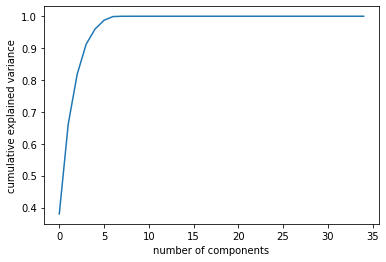

In [ ]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:8]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Observación: A partir de la grafica anterior se puede observar que con 7 u 8 componentes del total, estamos cumpliendo con mas del 98% de la varianza. Por esta razon solo con valores menores a 7 u 8 se lograran observar cambios significativos en los datos proyectados. 

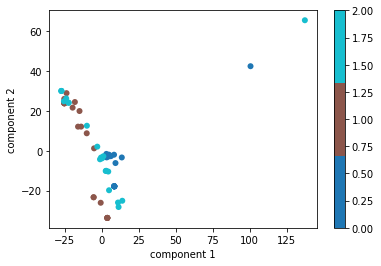

In [ ]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
def projectedZ_Components(n,data):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 35)
Z Projection size:  (63, 2)
PCA explained variance:  [653.77763169 485.27269569]
W Projection size:  (2, 35)


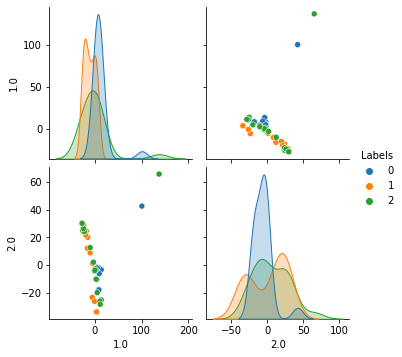

In [ ]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 35)
Z Projection size:  (63, 4)
PCA explained variance:  [653.77763169 485.27269569 268.81286431 161.7917661 ]
W Projection size:  (4, 35)


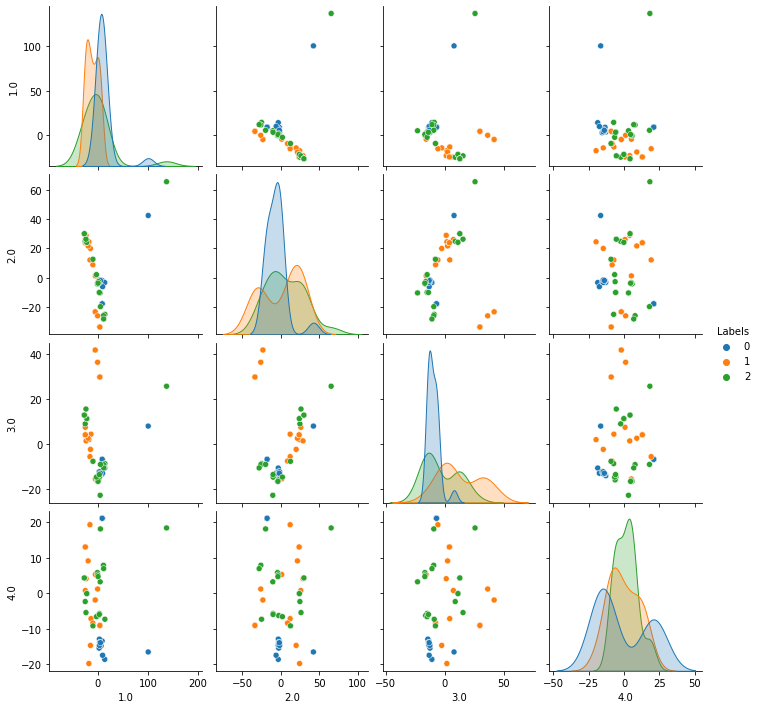

In [ ]:
n = 4
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 35)
Z Projection size:  (63, 8)
PCA explained variance:  [653.77763169 485.27269569 268.81286431 161.7917661   82.30252629
  47.06669731  19.91375227   1.56547842]
W Projection size:  (8, 35)


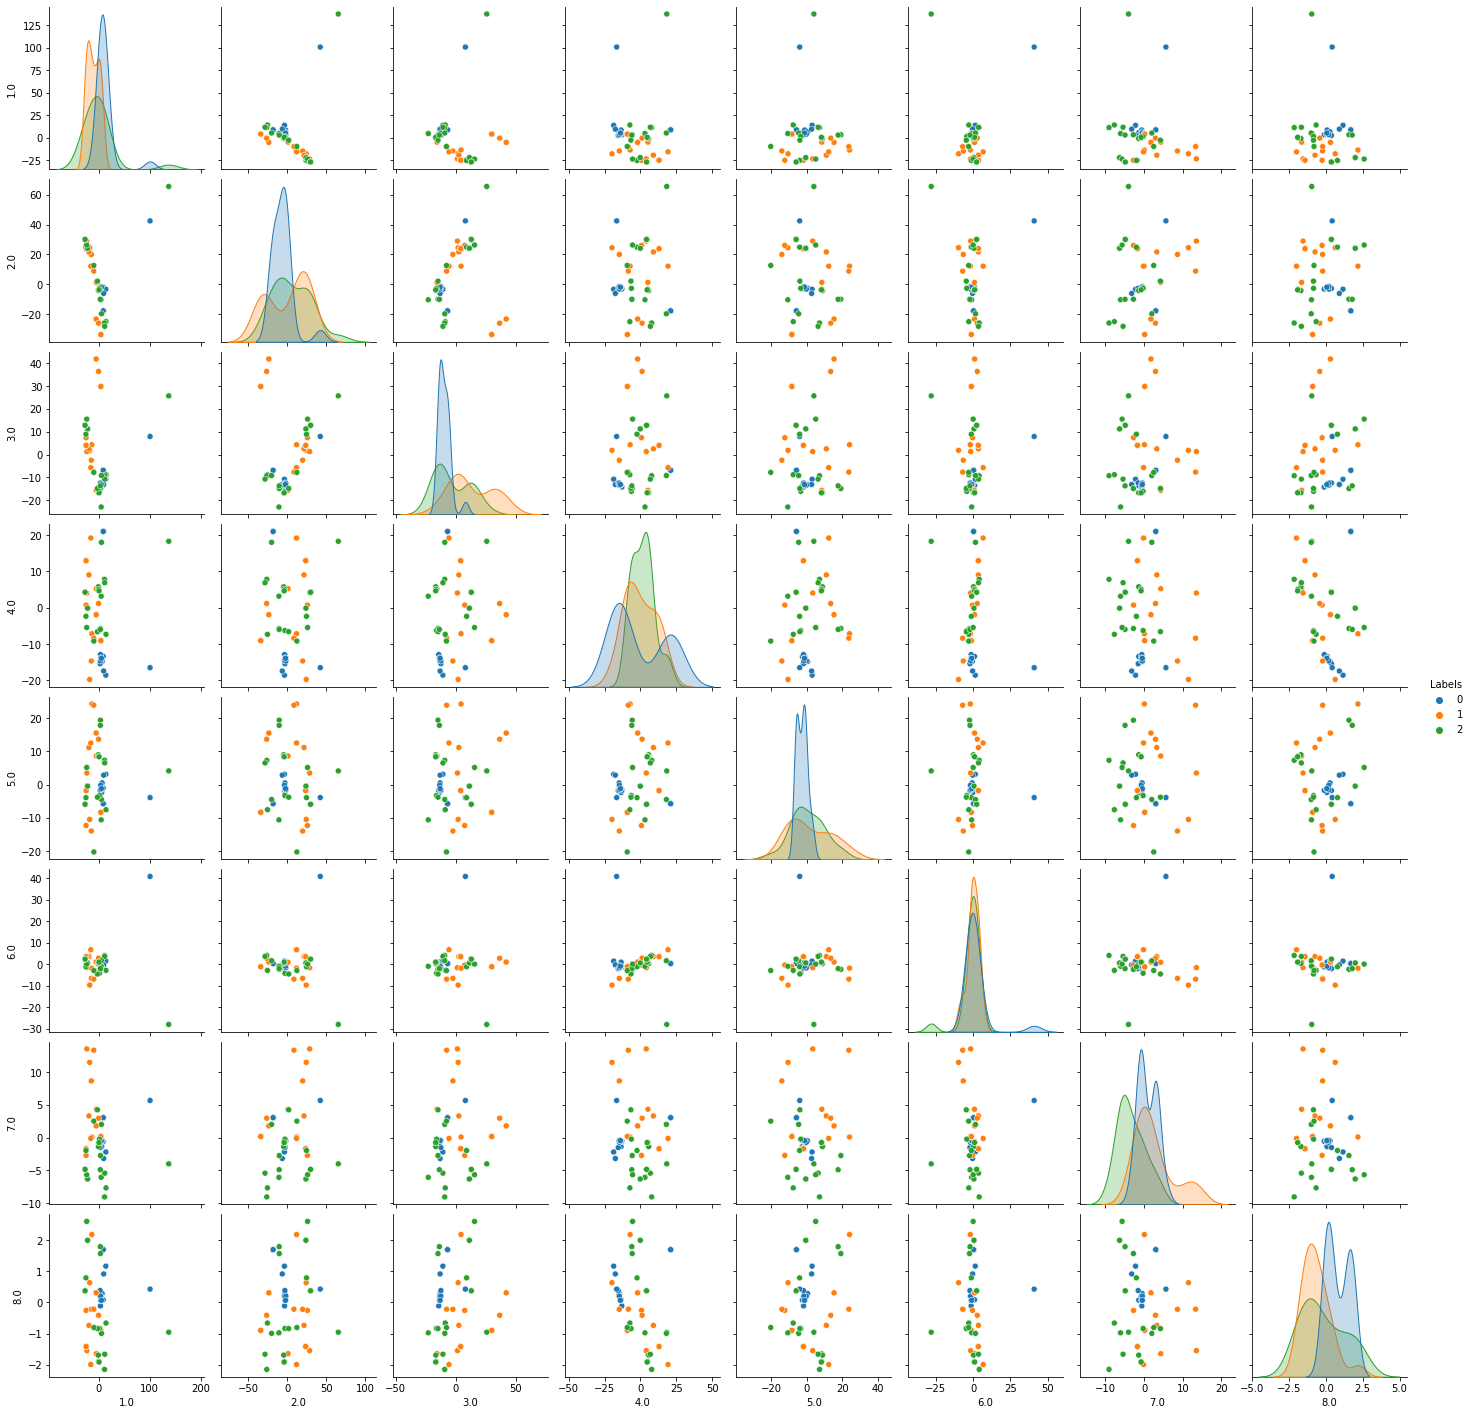

In [ ]:
n = 8
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Tele --> 0
Local --> 1
Reg --> 2

Observación: Es importante mencionar que el color azul corresponde a los telesismos, el color naranja a los sismos locales y el verde a los regionales. En base a los espacios representaciones de los espacios latentes, se aprecia que los datos obtenidos son mas distinguibles que los datos obtenidos en el dataframe del miniproyecto 1, a pesar de esto, los datos no se estan agrupando de la forma esperada. Una solucion para esto podria ser devolver los datos de espacio latente al espacio de entrada y evaluar si los datos se logran agrupar de mejor manera. 

In [ ]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
  ax1.plot()
  plt.show()

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
  ax2.plot()
  plt.show()
  return None

def Bayessian_Regression(X, t):
  pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
  pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
  pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

  # Seleccionamos los X de la clase 1
  X1 = X[t == 0]
  mu_C1 = np.mean(X1,axis = 0)
  # Seleccionamos los X de la clase 2
  X2 = X[t == 1]
  mu_C2 = np.mean(X2,axis = 0)
  # Seleccionamos los X de la clase 3
  X3 = X[t == 2]
  mu_C3 = np.mean(X3,axis = 0)

  plt.scatter(X[:,0],X[:,1],c = t)
  plt.plot(mu_C1[0],mu_C1[1],'or')
  plt.plot(mu_C2[0],mu_C2[1],'dg')
  plt.plot(mu_C3[0],mu_C3[1],'sy')

  N1 = np.sum(np.where(t == 0, 1., 0.))
  MU_1 = np.tile(mu_C1,(np.int(N1),1))
  S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)

  N2 = np.sum(np.where(t == 1, 1., 0.))
  MU_2 = np.tile(mu_C2,(np.int(N2),1))
  S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

  N3 = np.sum(np.where(t == 2, 1., 0.))
  MU_3 = np.tile(mu_C3,(np.int(N3),1))
  S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

  N = N1 + N2 + N3
  Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

  invSigma = np.linalg.inv(Sigma)
  w_C1 = invSigma@mu_C1
  w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

  w_C2 = invSigma@mu_C2
  w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

  w_C3 = invSigma@mu_C3
  w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

  # Para las activaciones
  A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
  A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
  A3 = (X@w_C3 + w_30).reshape(np.int(N),1)
  A = np.concatenate((A1,A2,A3),axis = 1)

  expA = np.exp(A)
  aux = np.sum(expA,axis = 1).reshape(int(N),1)
  auxM = np.tile(aux,(1,3))

  p_Ck_dado_X =  expA/auxM # Posterior: y_Est
  t_Est = np.argmax(p_Ck_dado_X, axis = 1)

  Acc = accuracy_score(t,t_Est)
  cMat = confusion_matrix(t,t_Est)

  print('Accuracy: ',Acc)
  
  ax = ConfusionMatrixDisplay(cMat, display_labels = ['telesismo','local','regional'])
  ax.plot()
  plt.show()
  return None

##Regresion Logistica para los datos en el espacio de entrada:

Acuracy Train:  0.7659574468085106
Acuracy Test:  0.875


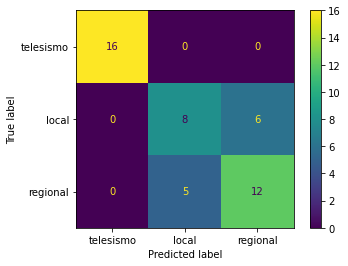

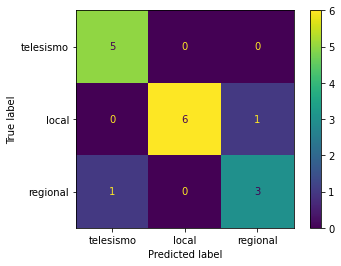

In [ ]:
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)

##Regresion Logistica para los datos en el espacio de latente:



Acuracy Train:  1.0
Acuracy Test:  0.8125


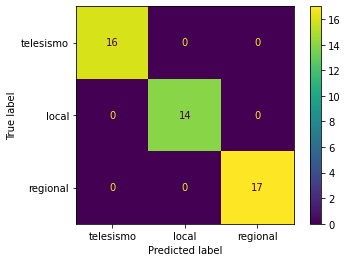

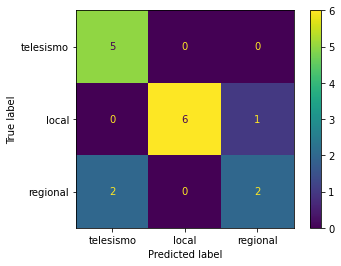

In [ ]:
n = 8
modelPCA=PCA(n_components=n) # Hacemos PCA con n componentes.
X = dataSismo 
X_PCA = modelPCA.fit_transform(X)
Y = Tags
Logistic_Regression(X_PCA, Y)

Observacion: Es importante maniefestar que la regresion logistica, tuvo mejores resultados en el metodo de clasificacion con la matriz de confusión donde muestra resultados muy buenos con los datos de entrenamiento, lo cual tiene logica pues son los datos que deben estar correctamente ubicados y a su vez dar la posibililidad al metodo para que junto a unos datos de testeo como los de la siguiente grafica, trate de ubicarlos en su espacio especifico. Se observa claramente que los telesismo se logran clasificar de manera correcta con respecto a los locales, pero cuando se compara respecto a los de telesismo vemos que hay un error de 2 en la percepcion del dato. En los sismos locales la matriz indica una buena clasificacion respectos a los otros sismos, finalmente el regional es el tipo de sismo que mas logra confundirse o variar respecto a los otros tipos de sismos. Es una solucion en el espacio latente que da otra perspectiva de las observaciones y permite un avance diferente hacia una clasificacion total.

##Clasificacion Bayesiana para los datos del espacio de entrada:

Accuracy:  0.6190476190476191


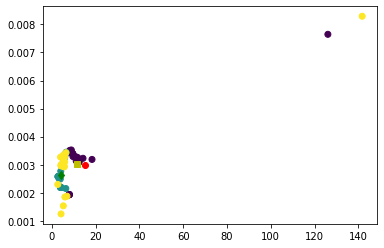

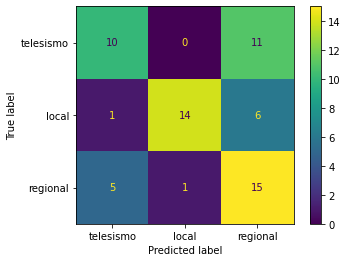

In [ ]:
X = dataSismo[:, 2:4]
t = np.array(Tags)
Bayessian_Regression(X, t)

##Clasificacion Bayesiana para los datos del espacio latente:

Accuracy:  0.9206349206349206


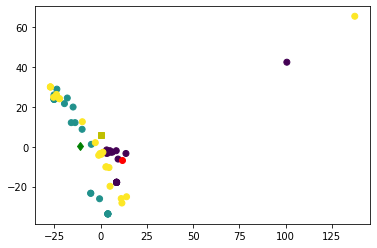

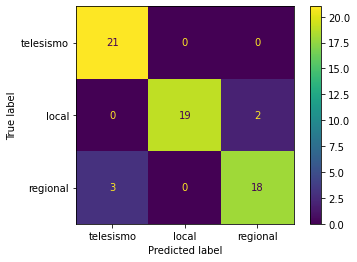

In [ ]:
n = 8
modelPCA = PCA(n_components=n) # Hacemos PCA con n componentes.
X = dataSismo 
X_PCA = modelPCA.fit_transform(X)
t = np.array(Tags)
Bayessian_Regression(X_PCA, t)

Utilizando el metodo de clasificacion bayesiano, cuando trabajamos con los datos en el espacio de entrada, obtenemos peores resultados respecto a la clasificacion logistica, esto puede deberse a que la variacion de los datos es muy grande lo cual genera una dispersion en los datos y provoca una clasificacion incorrecta de las observaciones. 

En cambio podemos apreciar que para los datos en el espacio latente, podemos apreciar que los resultados mejoraron considerablemente, ya que los telesismos se logran clasificar de manera correcta, y solo se producen 2 errores en los sismos locales y 3 en los regionales, lo cual deja en evidencia la gran ventaja que representa el hacer uso de pca antes de someter nuestros datos a un método de clasificación.

##Visualización de los rostros en el espacio de entrada:

Text(0, 0.5, '-dim\nreconstruction')

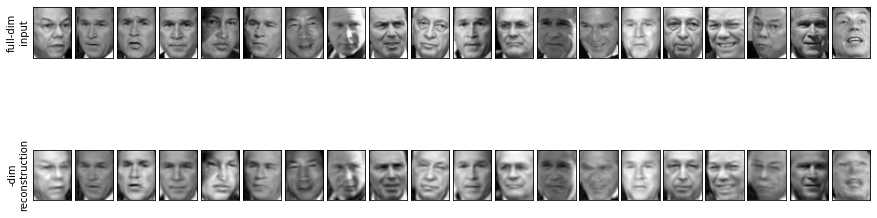

In [ ]:
# Compute the components and projected faces
faces = fetch_lfw_people(min_faces_per_person=60)
X_vectores = faces.data
pca = PCA(n_components = 128,svd_solver='randomized').fit(faces.data)
pca.fit(X_vectores)
Z = pca.transform(X_vectores)
projected = pca.inverse_transform(Z)

fig, ax = plt.subplots(2, 20, figsize=(15,5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(20):
    ax[0, i].imshow(X_vectores[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('-dim\nreconstruction')

##Visualización de los rostros en el espacio latente:

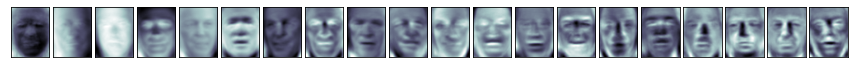

In [ ]:
Wprojection = pca.components_
PC1 = Wprojection[0]

fig, axes = plt.subplots(1, 20, figsize=(15, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

Aquí hacemos uso de pca.components_ para hacer una representación gráfica de las componentes mas representativas de las imágenes proyectadas. Al analizar las mismas observamos que algunos de estos rostros son identificables a simple vista, mientras que otros tienen características que los hacen dificiles de reconocer, pero que para nuestro algoritmo representan características importantes que pueden ser utilizadas en el proceso de clasificación de las imagenes.

##Reconocimiento con los Eigenfaces mediante regresión logística:

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)
X_vectores = faces.data
pca = PCA(n_components = 350,svd_solver='randomized').fit(faces.data)
pca.fit(X_vectores)
Z = pca.transform(X_vectores)
y = faces.target

model = SVC(C = 100)
Xtrain, Xtest, ytrain, ytest = train_test_split(Z, y, test_size = 0.3, random_state = 123)
model.fit(Xtrain,ytrain)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.8049382716049382


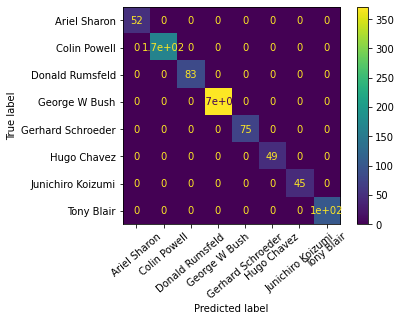

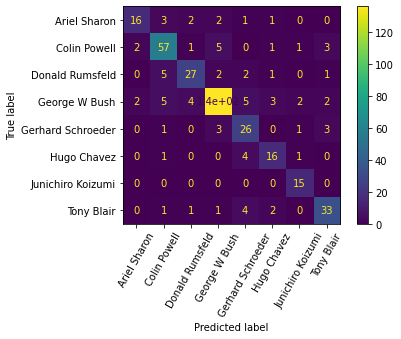

In [ ]:
modelBayesian = LogisticRegression(C = 0.0001)
modelBayesian.fit(Xtrain,ytrain)
# Realizamos la predicción tanto para train como para test
yEst_train = modelBayesian.predict(Xtrain)
yEst_test = modelBayesian.predict(Xtest)
# Analicemos el error de predicción
Acc_train = accuracy_score(ytrain, yEst_train)
cMat_train = confusion_matrix(ytrain, yEst_train)
Acc_test = accuracy_score(ytest, yEst_test)
cMat_test = confusion_matrix(ytest, yEst_test)

print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=faces.target_names)
ax1.plot(xticks_rotation = 40)
plt.show()
ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=faces.target_names)
ax2.plot(xticks_rotation = 60)
plt.show()

En base a los resultados obtenidos, podemos apreciar que hay una cantidad significativa de errores, los cuales pueden ser generados por la misma base de datos, ya que esta no se encuentra balanceada, lo que quiere decir que hay mas imágenes de personas como george bush, comparado con otras personas, por esta razón tiende a obtenerse un valor de accuracy test que no es tan bueno. 

Para mejorar el valor del accuracy test, se pueden modificar parámetros como la penalización o aumentar el número de componentes con las que se realiza PCA. Al hacer lo anterior se logró subir de un accuracy test de 0.7 a un accuracy test de 0.8 lo cual representa una mejora significativa.

##Conclusiones:

--> Al observar los rostros en el espacio de entrada y en el espacio latente, podemos apreciar claramente la relación que existe entre el número de componentes y la varianza, ya que inicialmente, cuando tomamos pocas componentes para realizar PCA, no abarcamos un valor de varianza lo suficientemente grande como para hacer que las imagenes representadas sean distinguibles; en cambio, cuanto tomamos un número de componentes muy alto (que cubra mas del 90% de la varianza) los cambios introducidos sobre
las imagenes son casi inapreciables, lo cual se debe a que estas componentes aportan muy poca varianza.

--> Es importante recalcar que gracias al uso de pca en las eigen faces a un espacio latente, este metodo mejora notablemente la visualizacion de las imagenes de rayos x o mapeadas en 'bone', esto se fundamenta en que a medida que la cantidad de componentes aumenta la funcion en la cual se puede actuar es mas compleja y da una mejor visibilidad. Esto se nota en los gestos de las caras , las expresiones y hasta en las siluetas de la cara. 

--> Los metodos de clasificacion usando el espacio latente de las observaciones muestran mejoras sustancionales, respecto a una clasificacion en el espacio original.

--> La diferenciacion de las eigen faces en todo el modelamiento esta basado directamente entre la matriz de confusion y sus respectivas representaciones en el espacio latente. Mas valores por fuera de la diagonal, explican una mayor dificultad por parte de los sistemas de clasificacion en poder organizar y determinar la entropia de los datos que hay en el dataset. 

--> Es claro que los valores que varian mas en la matriz de confusion como lo son george bush, colin, sharon, blair. Explica que hay mayor cantidad de datos en el dataset que se confunden con otros presidentes, esto es debido a que hay mayor cantidad de imagenes de un solo presidente que de otros, es decir, no hay balance entre todos las imagenes, lo que ocasiona una mayor probabilidad de error por parte del metodo no supervisado bayesiano. 



#Link del GitHub#


##https://github.com/MyFirstVlog/miniProyecto-2-ts3.git##

